In [39]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import joblib

In [55]:
dataset=pd.read_csv("Salary_Data.csv")

In [56]:
dataset.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [58]:
dataset['YearsExperience']=dataset['YearsExperience'].astype(int)

Text(0, 0.5, 'Salary')

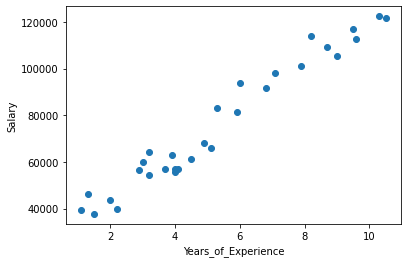

In [9]:
plt.scatter(dataset.YearsExperience,dataset.Salary)
plt.xlabel("Years_of_Experience")
plt.ylabel("Salary")

In [60]:
X=dataset.drop(['Salary'],axis='columns').values

In [61]:
X

array([[ 1],
       [ 1],
       [ 1],
       [ 2],
       [ 2],
       [ 2],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 5],
       [ 5],
       [ 5],
       [ 6],
       [ 6],
       [ 7],
       [ 7],
       [ 8],
       [ 8],
       [ 9],
       [ 9],
       [ 9],
       [10],
       [10]])

In [62]:
y=dataset.drop(['YearsExperience'],axis='columns').values

In [63]:
y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

# Spliting Data into Training and Testing

In [64]:
dataset['YearsExperience'].dtype

dtype('int32')

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [67]:
X_train.size

21

In [68]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [69]:
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [70]:
pred_LR=LR.predict(X_test)

In [71]:
pred_LR

array([[ 86814.50404858],
       [106144.05465587],
       [ 57820.17813765],
       [ 77149.72874494],
       [ 38490.62753036],
       [115808.82995951],
       [115808.82995951],
       [ 77149.72874494],
       [115808.82995951]])

In [72]:
diff=y_test-pred_LR

In [99]:
#res_df=pd.concat([pd.series(pred_LR),pd.series(y_test),pd.series(diff_LR)],axis=1)

In [94]:
diff_LR=pd.DataFrame(diff)
y_test_df=pd.DataFrame(y_test)
pred_LR_df=pd.DataFrame(pred_LR)

In [97]:
res_df=pd.concat([pred_LR_df,y_test_df,diff_LR],axis=1)
res_df.columns=['Predicted',"Origional","Diff"]

In [98]:
res_df

,Predicted,Origional,Diff
0,91100.582558,91738.0,637.417442
1,109297.208882,109431.0,133.791118
2,56622.764259,54445.0,-2177.764259
3,82481.127983,81363.0,-1118.127983
4,40341.572284,37731.0,-2610.572284
5,117916.663457,112635.0,-5281.663457
6,116958.946282,116969.0,10.053718
7,74819.390583,66029.0,-8790.390583
8,112170.360407,105582.0,-6588.360407


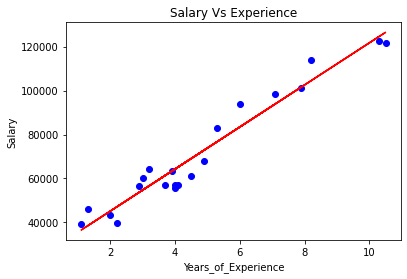

In [108]:
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,LR.predict(X_train),color='red')
plt.title("Salary Vs Experience")
plt.xlabel("Years_of_Experience")
plt.ylabel("Salary")
plt.show()

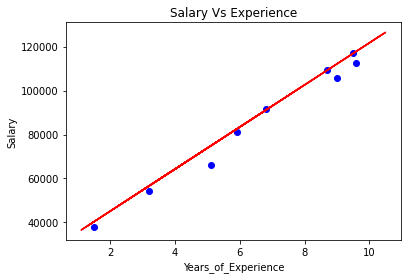

In [109]:
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_train,LR.predict(X_train),color='red')
plt.title("Salary Vs Experience")
plt.xlabel("Years_of_Experience")
plt.ylabel("Salary")
plt.show()

In [120]:
from sklearn import metrics

In [117]:
metrics.r2_score(y_test,pred_LR)

0.9746363787521536

In [132]:
rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_LR))

In [133]:
rmse

4240.095458517901

# Decision Tree Regressor

In [121]:
from sklearn.tree import DecisionTreeRegressor

In [123]:
DT=DecisionTreeRegressor()

In [124]:
DT.fit(X_train,y_train)

DecisionTreeRegressor()

In [125]:
y_pred_dt=(DT.predict(X_test))

In [126]:
y_pred_dt

array([ 98273., 113812.,  64445.,  93940.,  46205., 122391., 122391.,
        67938., 113812.])

In [127]:
y_test

array([[ 91738.],
       [109431.],
       [ 54445.],
       [ 81363.],
       [ 37731.],
       [112635.],
       [116969.],
       [ 66029.],
       [105582.]])

In [129]:
metrics.r2_score(y_test,y_pred_dt)

0.9078533782708867

In [130]:
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred_dt))

In [131]:
rmse

8081.830045781023

In [134]:
from sklearn import tree

In [135]:
text_representation=tree.export_text(DT)

In [137]:
print(text_representation)

|--- feature_0 <= 5.10
|   |--- feature_0 <= 2.55
|   |   |--- feature_0 <= 1.20
|   |   |   |--- value: [39343.00]
|   |   |--- feature_0 >  1.20
|   |   |   |--- feature_0 <= 2.10
|   |   |   |   |--- feature_0 <= 1.65
|   |   |   |   |   |--- value: [46205.00]
|   |   |   |   |--- feature_0 >  1.65
|   |   |   |   |   |--- value: [43525.00]
|   |   |   |--- feature_0 >  2.10
|   |   |   |   |--- value: [39891.00]
|   |--- feature_0 >  2.55
|   |   |--- feature_0 <= 4.70
|   |   |   |--- feature_0 <= 3.95
|   |   |   |   |--- feature_0 <= 2.95
|   |   |   |   |   |--- value: [56642.00]
|   |   |   |   |--- feature_0 >  2.95
|   |   |   |   |   |--- feature_0 <= 3.80
|   |   |   |   |   |   |--- feature_0 <= 3.45
|   |   |   |   |   |   |   |--- feature_0 <= 3.10
|   |   |   |   |   |   |   |   |--- value: [60150.00]
|   |   |   |   |   |   |   |--- feature_0 >  3.10
|   |   |   |   |   |   |   |   |--- value: [64445.00]
|   |   |   |   |   |   |--- feature_0 >  3.45
|   |   |   |   |

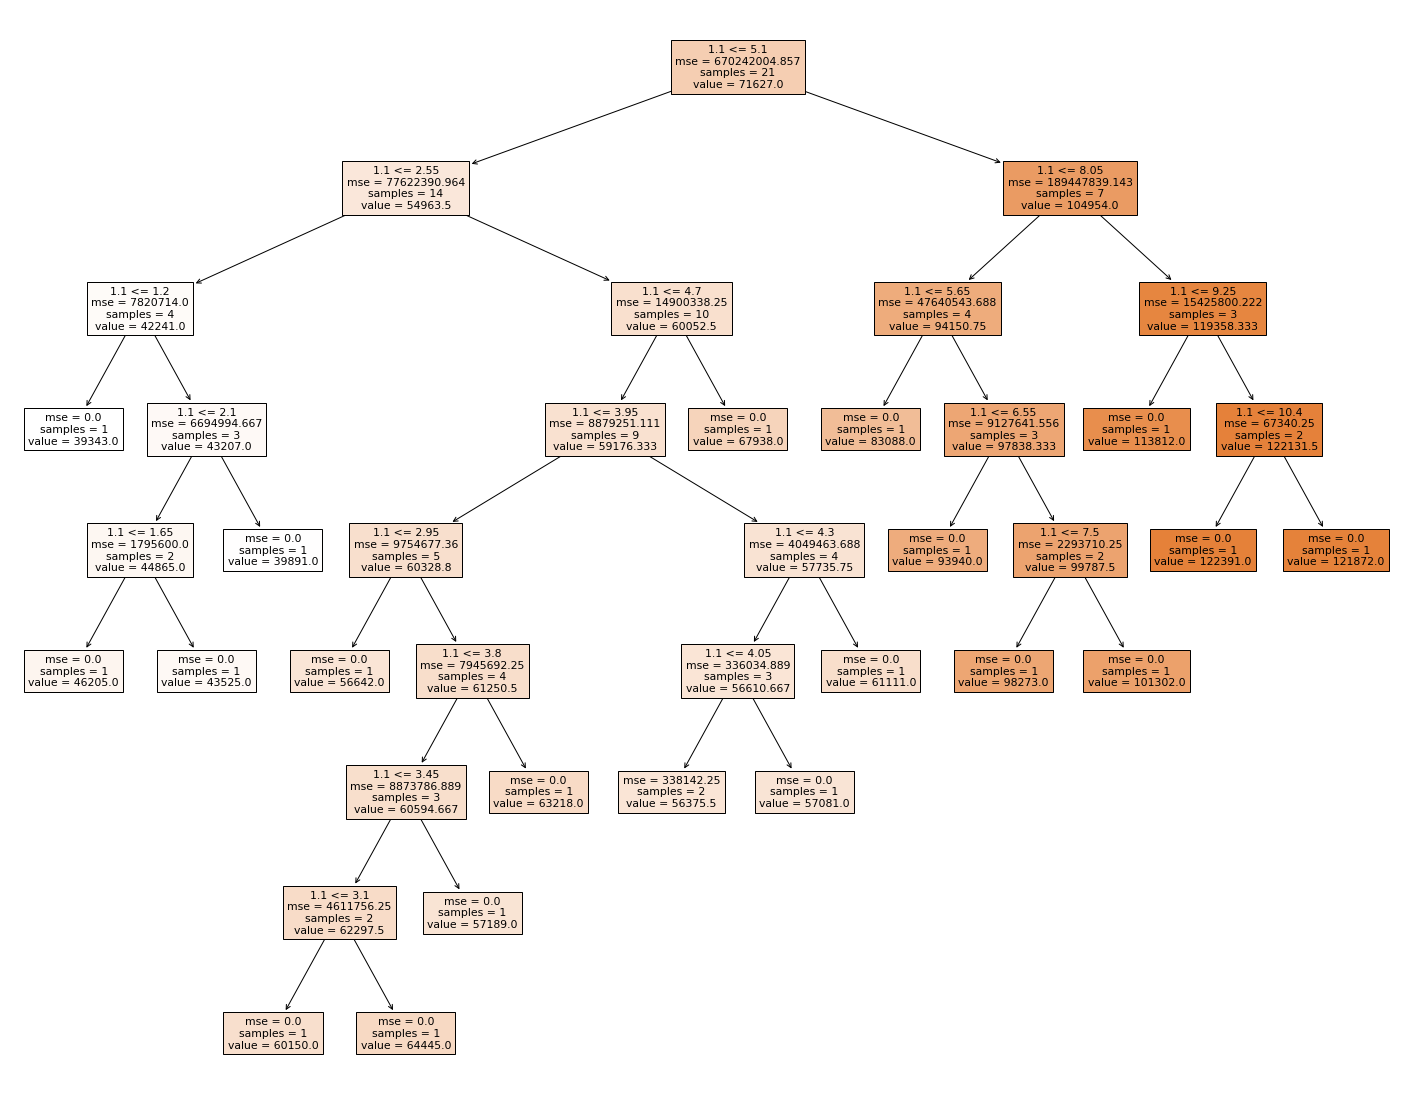

In [142]:
fig=plt.figure(figsize=(25,20))
_=tree.plot_tree(DT,feature_names=dataset['YearsExperience'],filled=True)

In [25]:
from sklearn.metrics import confusion_matrix,classification_report

In [28]:
#confusion_matrix(pred_LR,y_test)

In [34]:
#pred_LR.score(X_test)

In [73]:
LR.score(X_test,y_test)

0.9522774388709115

In [74]:
filename='final.sav'
joblib.dump(LR,filename)

['final.sav']

In [88]:
salary=LR.predict([[3]]).astype(object)

In [90]:
salary.

AttributeError: 'numpy.ndarray' object has no attribute 'split'